# Processing COVID AMP dataset for analysis and visualization

## Import

In [795]:
import pandas as pd
import numpy as np
from pyairtable import Table

import datetime as dt
import matplotlib
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as md
import seaborn as sns
import geopandas
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_key = 'appoXaOlIgpiHK3I2'
table_name = 'Policy Database'

# AIRTABLE API KEY -- DON'T COMMIT INTO GIT!
api_key = 'MY_AIRTABLE_KEY'

In [89]:
table = Table(api_key, base_key, table_name)

records = table.all()

In [190]:
full = pd.DataFrame.from_records((r['fields'] for r in records))

## Cleaning

In [191]:
# remove non-policy guidance
full = full.loc[full['Policy/law type'] != 'Non-policy guidance']

In [192]:
# drop rows missing key information
full = full.dropna(subset=['Unique ID',
                           'Policy category', 
                           'Policy description', 
                           'Authorizing country ISO'])

In [193]:
# drop down to a select number of relevant columns
cols = ['Unique ID','Issued date','Effective start date','Anticipated end date','Actual end date','Policy category','Policy subcategory', 'Policy target','Policy relaxing or restricting','Authorizing country ISO','Auth state names (lookup)']
full = full[cols]

In [194]:
# convert to datetime for indexing
full['Issued date'] = pd.to_datetime(full['Issued date'], format='%Y/%m/%d')
full['Effective start date'] = pd.to_datetime(full['Effective start date'], format='%Y/%m/%d')
full['Anticipated end date'] = pd.to_datetime(full['Anticipated end date'], format='%Y/%m/%d')
full['Actual end date'] = pd.to_datetime(full['Actual end date'], format='%Y/%m/%d')

In [195]:
# rename geo columns 
full = full.rename(columns={'Auth state names (lookup)': 'State', 'Authorizing country ISO':'Country'})

In [196]:
# remove brackets from state and country name
full['State'] = full['State'].astype(str)
full['State'] = full['State'].str.extract("\'(.*)\'")

full['Country'] = full['Country'].astype(str)
full['Country'] = full['Country'].str.extract("\'(.*)\'")

In [165]:
full.to_csv('processed/airtable_cleaned_033123.csv')

## Visualizations

### Toolkit

In [405]:
clean = full.copy()

In [406]:
# Cut off for analysis
clean = clean.loc[clean['Effective start date'] > '2019-12-31'].reset_index(drop=True)
clean = clean.loc[clean['Effective start date'] < '2023-01-01'].reset_index(drop=True)


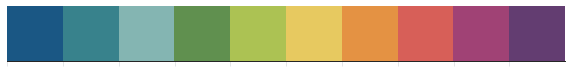

In [537]:
# Define rainbow color palette for categories
rainbow = {
    'Authorization and enforcement': '#1A5784',
    'Contact tracing/Testing': '#38828C',
    'Emergency declarations': '#84B5B2',
    'Enabling and relief measures':'#60904F',
    'Face mask':'#ACC253',
    'Military mobilization':'#E7C960',
    'Social distancing':'#E49243',
    'Support for public health and clinical capacity':'#D75F58',
    'Travel restrictions':'#A04275',
    'Vaccinations':'#633D71'
}

colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71']
sns.palplot(sns.color_palette(colors))



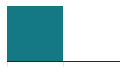

In [408]:
# Define gradient color
gradient = ['#147885', '#FFFFFF']
sns.palplot(sns.color_palette(gradient))

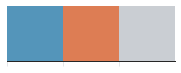

In [409]:
# Define small color palette for relaxing/restricting
three = ['#5495BA','#DD7D54','#CACED3']
sns.palplot(sns.color_palette(three))

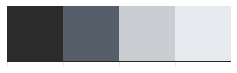

In [410]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [717]:
# Define constants
figure_size = (18,6)

# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 1, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.9

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 12

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 12


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.5

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125



# Set axis labels
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelcolor'] = chart[1]

### Figure 1

#### 1B: Category distribution of policies by month, global

In [566]:
# Count all policies in a given category, by month
global_cat_count = clean.groupby(['Policy category', pd.Grouper(key='Effective start date', freq='M')]).size().reset_index(name="Policy count")

In [567]:
global_cat_count['Effective start date']= global_cat_count['Effective start date']- pd.offsets.MonthBegin(1)

In [568]:
global_cat_count_pivot = global_cat_count.pivot_table(index=pd.Grouper(key='Effective start date', freq='M'), columns='Policy category', values='Policy count', fill_value=0)
global_cat_count_pivot = global_cat_count_pivot.reset_index().rename_axis(None, axis=1)

In [569]:
global_cat_count_pivot['Effective start date']= global_cat_count_pivot['Effective start date']- pd.offsets.MonthBegin(1)

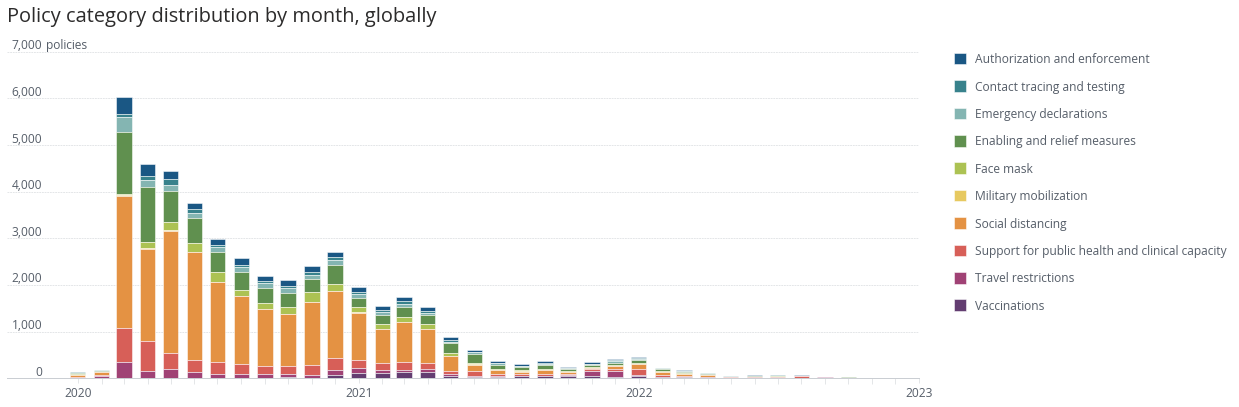

In [771]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')


# Define variables
x=global_cat_count_pivot['Effective start date']
y1=global_cat_count_pivot['Authorization and enforcement']
y2=global_cat_count_pivot['Contact tracing/Testing']
y3=global_cat_count_pivot['Emergency declarations']
y4=global_cat_count_pivot['Enabling and relief measures']
y5=global_cat_count_pivot['Face mask']
y6=global_cat_count_pivot['Military mobilization']
y7=global_cat_count_pivot['Social distancing']
y8=global_cat_count_pivot['Support for public health and clinical capacity']
y9= global_cat_count_pivot['Travel restrictions']
y10 = global_cat_count_pivot['Vaccinations']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='Authorization and enforcement') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Contact tracing and testing')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Emergency declarations')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Enabling and relief measures')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Face mask')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Military mobilization')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Social distancing')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[7], label='Support for public health and clinical capacity')
plt.bar(x, y9, bottom=y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Travel restrictions')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Vaccinations')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,7000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Policy category distribution by month, globally"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("policies", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.35,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/global_cat_per_month.svg', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

#### 1D: Category distribution of policies by month, US

In [779]:
us_cat_count = clean.loc[clean['Country'] == 'USA'].reset_index(drop=True)

In [781]:
# Count all policies in a given category, by month
us_cat_count = us_cat_count.groupby(['Policy category', pd.Grouper(key='Effective start date', freq='M')]).size().reset_index(name="Policy count")

In [782]:
us_cat_count['Effective start date']= us_cat_count['Effective start date']- pd.offsets.MonthBegin(1)

In [783]:
us_cat_count_pivot = us_cat_count.pivot_table(index=pd.Grouper(key='Effective start date', freq='M'), columns='Policy category', values='Policy count', fill_value=0)
us_cat_count_pivot = us_cat_count_pivot.reset_index().rename_axis(None, axis=1)

In [784]:
us_cat_count_pivot['Effective start date']= us_cat_count_pivot['Effective start date']- pd.offsets.MonthBegin(1)

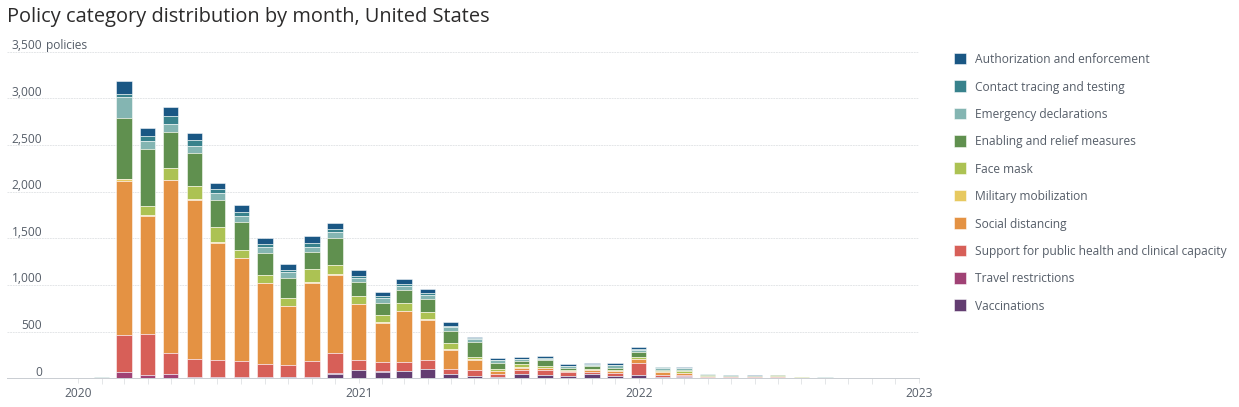

In [787]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')


# Define variables
x=us_cat_count_pivot['Effective start date']
y1=us_cat_count_pivot['Authorization and enforcement']
y2=us_cat_count_pivot['Contact tracing/Testing']
y3=us_cat_count_pivot['Emergency declarations']
y4=us_cat_count_pivot['Enabling and relief measures']
y5=us_cat_count_pivot['Face mask']
y6=us_cat_count_pivot['Military mobilization']
y7=us_cat_count_pivot['Social distancing']
y8=us_cat_count_pivot['Support for public health and clinical capacity']
y9= us_cat_count_pivot['Travel restrictions']
y10 = us_cat_count_pivot['Vaccinations']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='Authorization and enforcement') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Contact tracing and testing')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Emergency declarations')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Enabling and relief measures')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Face mask')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Military mobilization')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Social distancing')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[7], label='Support for public health and clinical capacity')
plt.bar(x, y9, bottom=y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Travel restrictions')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Vaccinations')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,3500)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Policy category distribution by month, United States"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("policies", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.35,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
# plt.show()
plt.savefig('figures/us_cat_per_month.svg', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

#### 1A: Total policies collected globally

In [843]:
# Clean the clean df again
clean.loc[clean['Country'] == 'GB-ENG', 'Country'] = 'GBR'
clean.loc[clean['Country'] == 'GB-NIR', 'Country'] = 'GBR'
clean.loc[clean['Country'] == 'GB-SCT', 'Country'] = 'GBR'
clean.loc[clean['Country'] == 'GB-WLS', 'Country'] = 'GBR'
clean.loc[clean['Country'] == 'SXC', 'Country'] = 'KNA'

# Count all policies in a given category, by month
global_count = clean.groupby(['Country']).size().reset_index(name="Policy count")

In [845]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"Country"})
cols = ['name','Country','geometry']
world = world[cols]
world = world.sort_values(by="Country")

In [846]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'Country'] = 'FRA'
world.loc[world['name'] == 'Norway', 'Country'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'Country'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'Country'] = 'RKS'

In [847]:
# Add countries to geopandas
new_country = pd.DataFrame({'name': ['Aruba','American Samoa','Antigua and Barbuda','Bahrain','Curaçao','Cayman Islands','Hong Kong','Saint Kitts and Nevis','Macao','Maldives','Marshall Islands','Malta','Mauritius','Palau','Singapore','Seychelles','Tuvalu','Saint Vincent and the Grenadines','Samoa'], 
                            'Country': ['ABW','ASW','ATG','BHR','CUW','CYM','HKG','KNA','MAC','MDV','MHL','MLT','MUS','PLW','SGP','SYC','TUV','VCT','WSM']})
world = world.append(new_country, ignore_index=True)


In [848]:
merge = pd.merge(world,global_count,on='Country')

<AxesSubplot:>

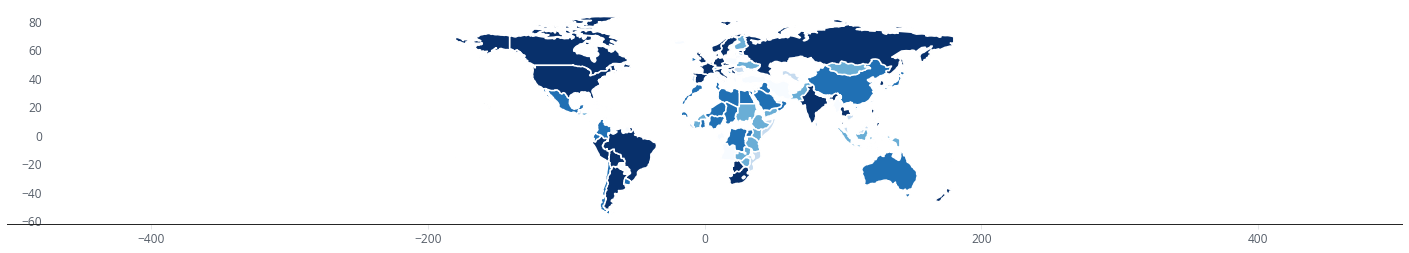

In [860]:
merge.plot(column='Policy count',figsize=(25,20),scheme='quantiles',cmap='Blues')